<a href="https://colab.research.google.com/github/LaisHott/la-robotic-cafe-market-analysis/blob/main/Notebook_Projeto_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Mercado para a Cafeteria de Garçons Robôs em Los Angeles

No cenário em constante evolução da indústria de restaurantes, a inovação desempenha um papel fundamental para a diferenciação e sucesso a longo prazo. Nesse contexto, a abertura de uma cafeteria com garçons robôs em Los Angeles não apenas representa uma ideia inovadora, mas também levanta questões cruciais sobre a sustentabilidade do empreendimento e a capacidade de manter o sucesso ao longo do tempo.

O projeto busca atender à demanda crescente por experiências únicas e tecnologicamente avançadas, ao mesmo tempo em que enfrenta os desafios associados à novidade, à concorrência e às preferências em constante mudança dos consumidores. A análise de mercado desempenha um papel central nesse contexto, permitindo-nos compreender a dinâmica do setor de alimentos e bebidas em Los Angeles e avaliar como a presença de garçons robôs pode influenciar o desempenho e a aceitação do público.

Ao final deste projeto, esperamos fornecer informações sólidas e confiáveis que embasem nossa estratégia de negócios e atraiam investidores interessados em apoiar nosso empreendimento inovador. Com a análise detalhada das condições de mercado, poderemos demonstrar que nossa cafeteria não apenas capitaliza sobre a novidade dos garçons robôs, mas também está posicionada para oferecer uma experiência excepcional e duradoura aos clientes, independentemente das tendências passageiras.

# Inicialização

Vamos começar com as bibliotecas necessárias relevantes para nossa análise.

In [6]:
# Carregando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from plotly import graph_objects as go
import plotly.express as px
from scipy import stats as st
import numpy as np

## Carregue os dados e prepare-os para a análise

Vamos carregar os dados relacionados aos restaurantes em Los Angeles. Garantiremos a integridade dos dados, verificando e corrigindo os tipos de informações em cada coluna. Também faremos a verificação e tratamento de valores faltantes e duplicados, se necessário, para garantir que os dados estejam prontos para análise.

***Descrição de dados***

Tabela **`rest_data`**:

`object_name` — nome de estabelecimento

`chain` — estabelecimento de rede (TRUE/FALSE)

`object_type` — tipo de estabelecimento

`address` — endereço

`number` — número de assentos

### Carregando os dados
Vamos armazenar os dados em uma variável específica e, em seguida, otimizá-los para a análise, certificando-nos de que cada coluna contenha o tipo correto de dados.

In [7]:
# Carregando os dados em um DataFrame
rest_data = pd.read_csv('rest_data_us.csv')

In [8]:
# Verificando as primeiras linhas do DataFrame para entender a estrutura dos dados
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [9]:
# Verificando informações sobre os tipos de dados e valores ausentes
rest_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 2.5 MB


In [10]:
# Verificando se há valores duplicados
print("Valores duplicados:", rest_data.duplicated().sum())

Valores duplicados: 0


### Processando e otimizando os dados

Uma vez que identificamos que há valores ausentes na coluna `chain`, podemos decidir como lidar com esses valores ausentes. Uma opção seria remover as linhas com valores ausentes ou substituí-los por algum valor padrão, uma vez que são apenas 3 valores ausentes e se trata de uma coluna true or false podemos substituir esse valores por false.

In [11]:
# Substituindo valores ausentes na coluna "chain" por False
rest_data['chain'].fillna(False, inplace=True)

<ipython-input-11-0f6558316c40>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rest_data['chain'].fillna(False, inplace=True)
<ipython-input-11-0f6558316c40>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rest_data['chain'].fillna(False, inplace=True)


In [12]:
# Deixando a coluna "chain" com o tipo de dados booleano
rest_data['chain'] = rest_data['chain'].astype(bool)

In [13]:
# Verificando as informações após o processamento
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


- Agora com os dados processados e otimizados podemos ir para a análise.

## Análise de dados

### Investigue as proporções de vários tipos de estabelecimentos. Construa um gráfico.

Vamos calcular as proporções dos tipos de estabelecimento utilizando o método *value_counts(normalize=True)* para que os valores sejam normalizados e representados como porcentagens. Em seguida, utilizaremos um gráfico de pizza para visualizar essas proporções.

Os gráficos de pizza são melhores para comparar proporções de algumas categorias

In [14]:
# Calculando as proporções dos tipos de estabelecimento
object_type_proportions = rest_data['object_type'].value_counts(normalize=True)
object_type_proportions

,proportion
object_type,
Restaurant,0.751736
Fast Food,0.110455
Cafe,0.045073
Pizza,0.033157
Bar,0.030256
Bakery,0.029323


In [15]:
# Criando um gráfico de pizza usando Plotly
fig = go.Figure(go.Pie(
    labels=object_type_proportions.index,
    values=object_type_proportions.values,
    title='Proporções de Vários Tipos de Estabelecimentos',
    marker_colors=px.colors.qualitative.Pastel,  # Usar paleta de cores Pastel
    pull=[0.1, 0, 0, 0, 0],  # Separação das fatias
    textinfo='percent+label'
))
fig.show()

1. **Restaurantes são Dominantes:** A categoria "Restaurantes" representa uma proporção significativamente alta (cerca de 75%) de todos os tipos de estabelecimentos em Los Angeles.

2. **Variedade de Fast Food:** Apesar de serem menos prevalentes do que restaurantes, os "Fast Foods" ainda têm uma proporção substancial (cerca de 11%). Isso sugere que opções rápidas e convenientes para refeições continuam a ser uma parte significativa do mercado.

3. **Cafés e Cafeterias:** A categoria "Café" e "Cafeteria" representa uma proporção combinada de aproximadamente 8%, indicando uma demanda contínua por lugares para tomar café e lanches.

4. **Diversidade nos Tipos de Estabelecimentos:** "Pizza" e "Bar" também têm proporções consideráveis, mas bem menores.


- **Estratégia de Diferenciação Importante:** É interessante notar que os "Cafés" e "Cafeterias" juntos representam uma proporção significativa, o que indica que ainda há demanda por lugares para encontros sociais e momentos de relaxamento.

- **Potencial de Inovação:** A presença de "Pizzarias" e "Bares" também pode indicar áreas onde a inovação e a diferenciação podem ser exploradas para atrair clientes.

Vamos explorar as tendências por Tipo de Estabelecimento através de um gráfico de barras empilhadas, que ilustrará a distribuição percentual dos diversos tipos de estabelecimentos, evidenciando a proporção de cada categoria.

In [16]:
# Calculando a distribuição percentual dos tipos de estabelecimentos
type_counts = rest_data['object_type'].value_counts(normalize=True) * 100
type_counts

,proportion
object_type,
Restaurant,75.173557
Fast Food,11.045488
Cafe,4.507305
Pizza,3.315719
Bar,3.025593
Bakery,2.932339


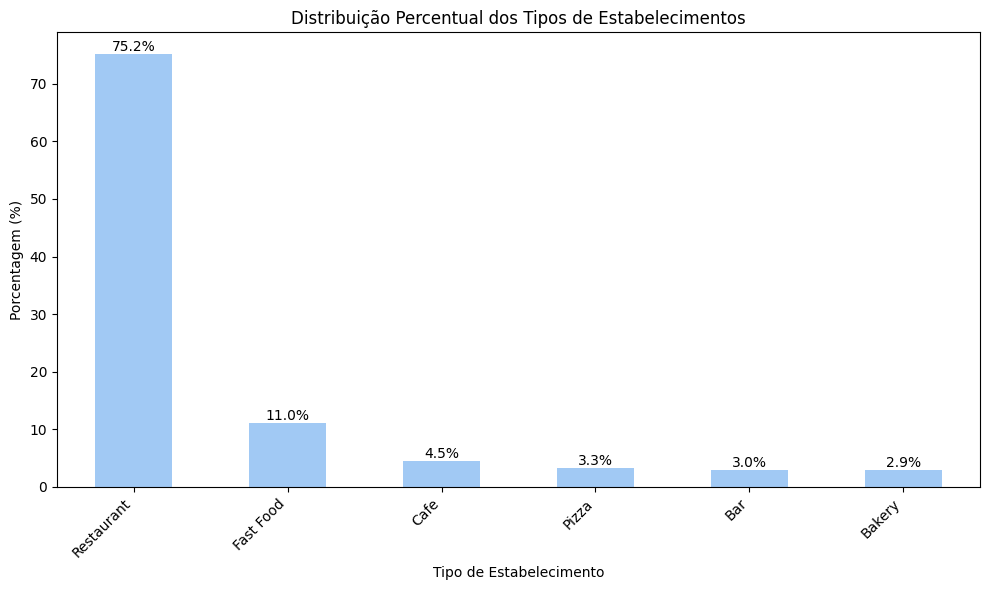

In [17]:
# Criando um gráfico de barra empilhada
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")  # Definir a paleta de cores
ax = type_counts.plot(kind='bar', stacked=True)
plt.title('Distribuição Percentual dos Tipos de Estabelecimentos')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=45, ha='right')
# Adicionando rótulos de porcentagem acima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- Vamos criar gráficos para aprimorar a visualização da proporção dos três tipos de estabelecimentos mais relevantes.

**RESTAURANTES**

In [18]:
# Filtrando dados para restaurantes
restaurants_data = rest_data[rest_data['object_type'] == 'Restaurant']
restaurants_data

,id,object_name,address,chain,object_type,number
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
...,...,...,...,...,...,...
9643,21429,DIVINE DIPS,601 S LOS ANGELES ST,False,Restaurant,25
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD # 1025,False,Restaurant,225
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93


<ipython-input-19-43637433294e>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




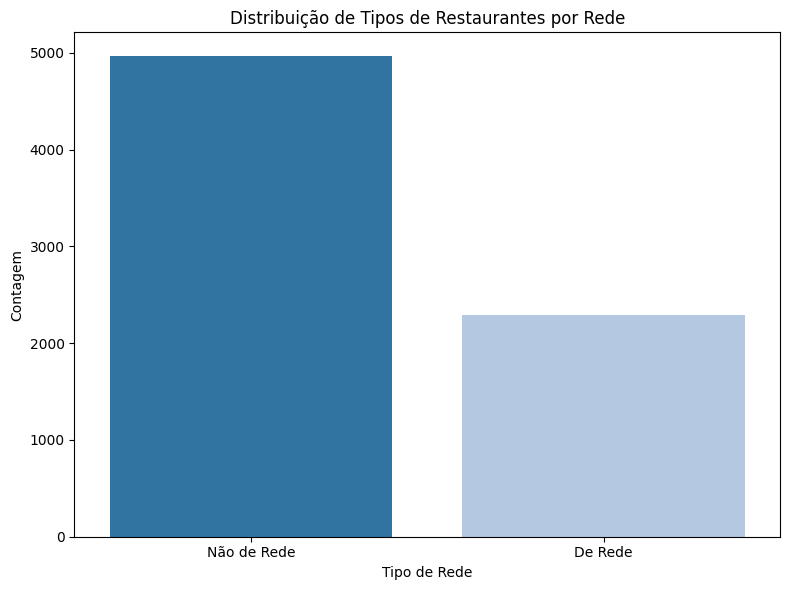

In [19]:
# Criando um gráfico de barras empilhadas
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
sns.countplot(data=restaurants_data, x='chain', palette='tab20')
plt.title('Distribuição de Tipos de Restaurantes por Rede')
plt.xlabel('Tipo de Rede')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não de Rede', 'De Rede'])
plt.tight_layout()
plt.show()

**FAST FOOD**

In [20]:
# Filtrando dados para fast foods
fast_food_data = rest_data[rest_data['object_type'] == 'Fast Food']
fast_food_data

,id,object_name,address,chain,object_type,number
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
13,11799,POPULAR DONUTS,3614 W SLAUSON AVE,False,Fast Food,18
40,11826,SUBWAY -52105,255 S GRAND AVE STE 101,True,Fast Food,37
42,11828,PANDA EXPRESS #2596,1544 S LA CIENEGA BLVD,True,Fast Food,22
...,...,...,...,...,...,...
9616,21402,TACOS LOS 4 CARNALES,5000 WHITTIER BLVD,False,Fast Food,9
9624,21410,TACOS EL RAYO,8025 AVALON BLVD,False,Fast Food,22
9638,21424,WATTS BURGERS,10203 S CENTRAL AVE,False,Fast Food,15
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135


<ipython-input-21-310db448eec2>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




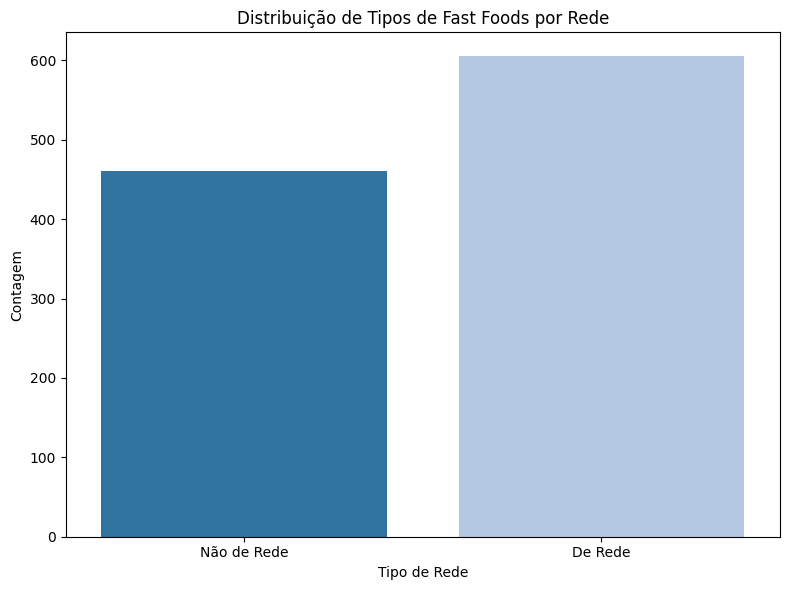

In [21]:
# Criando um gráfico de barras empilhadas
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
sns.countplot(data=fast_food_data, x='chain', palette='tab20')
plt.title('Distribuição de Tipos de Fast Foods por Rede')
plt.xlabel('Tipo de Rede')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não de Rede', 'De Rede'])
plt.tight_layout()
plt.show()

**CAFÉS**

In [22]:
# Filtrando dados para cafés
cafe_data = rest_data[rest_data['object_type'] == 'Cafe']
cafe_data

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
53,11839,PRIME GRIND COFFEE,714 W 1ST ST,False,Cafe,4
102,11888,CIVIL COFFEE,5629 N FIGUEROA ST,False,Cafe,17
121,11907,ANTIGUA CULTURAL COFFEE,3400 N FIGUEROA ST,False,Cafe,24
123,11909,MARIE'S COFFEE AND DELI,731 W 7TH ST,True,Cafe,36
...,...,...,...,...,...,...
9598,21384,GOOD PEOPLE COFFEE CO,11609 SANTA MONICA BLVD,False,Cafe,2
9610,21396,TERRAZA CAFE COFFEE SHOP,4017 1/2 CITY TERRACE DR,False,Cafe,1
9623,21409,310 COFFEE COMPANY,11623 WASHINGTON PL,False,Cafe,12
9635,21421,THE TEA & COFFEE EXCHANGE,6801 HOLLYWOOD BLVD # 120,False,Cafe,4


<ipython-input-23-1b3a934427fb>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




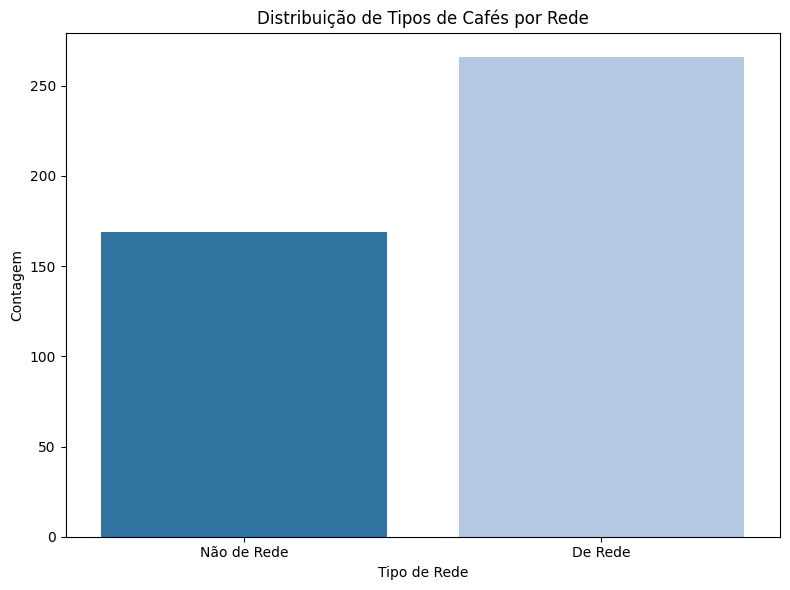

In [23]:
# Criando um gráfico de barras empilhadas
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
sns.countplot(data=cafe_data, x='chain', palette='tab20')
plt.title('Distribuição de Tipos de Cafés por Rede')
plt.xlabel('Tipo de Rede')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não de Rede', 'De Rede'])
plt.tight_layout()
plt.show()

### Investigue as proporções de estabelecimentos de rede e não. Construa um gráfico.

Vamos prosseguir para a análise das proporções de estabelecimentos de rede (chain) e não rede. Iremos construir um gráfico para visualizar essas proporções. Vamos calcular primeiro as proporções de estabelecimentos de rede e não de rede (chain e não chain) e criar um gráfico para visualizar.

Para visualizar uma variável que possui valores True e False, um tipo adequado de gráfico é o gráfico de barras agrupadas. Esse tipo de gráfico permite comparar facilmente as proporções entre as duas categorias, destacando as diferenças entre elas.

In [24]:
# Calculando as proporções de estabelecimentos de rede e não de rede
chain_proportions = rest_data['chain'].value_counts(normalize=True)
chain_proportions

,proportion
chain,
False,0.619107
True,0.380893


<ipython-input-25-bb8820238c8c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




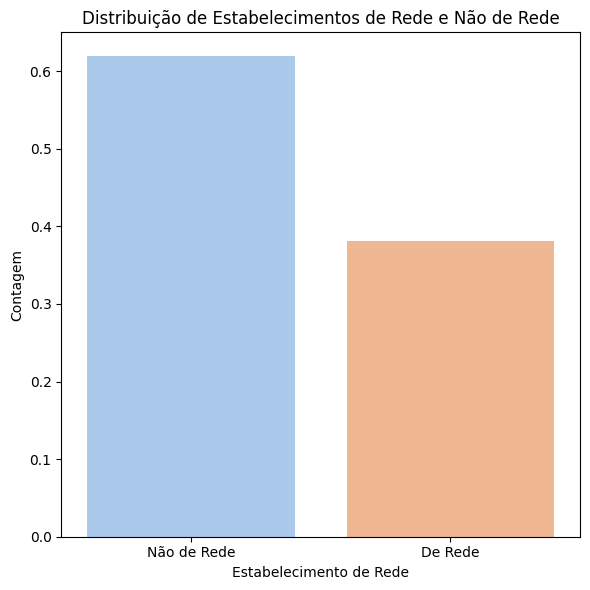

In [25]:
# Criando um gráfico de barras agrupadas
plt.figure(figsize=(6, 6))
sns.barplot(x=chain_proportions.index, y=chain_proportions.values, palette="pastel")
plt.title('Distribuição de Estabelecimentos de Rede e Não de Rede')
plt.xlabel('Estabelecimento de Rede')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não de Rede', 'De Rede'])
plt.tight_layout()
plt.show()

A maioria dos estabelecimentos (61,9%) não faz parte de uma rede, enquanto uma parcela significativa (38,1%) pertence a redes. Isso destaca a diversidade de opções em Los Angeles, com uma mistura de estabelecimentos independentes e de redes. A escolha entre ser independente ou fazer parte de uma rede pode ter impactos na percepção do cliente e nas estratégias de negócios.

- **Oportunidades de Inovação**: A coexistência de ambas as categorias cria oportunidades para inovação e diferenciação. Estabelecimentos independentes podem explorar aspectos únicos para se destacar, enquanto redes podem buscar formas de personalização e adaptação local.

### Qual tipo de estabelecimento é típico para redes?

Para identificar qual tipo de estabelecimento é mais típico para redes, podemos analisar a distribuição dos tipos de estabelecimento para ambos os casos: estabelecimentos de rede (True) e não de rede (False). As barras coloridas permitirão comparar visualmente a proporção de cada tipo de estabelecimento em ambas as categorias.


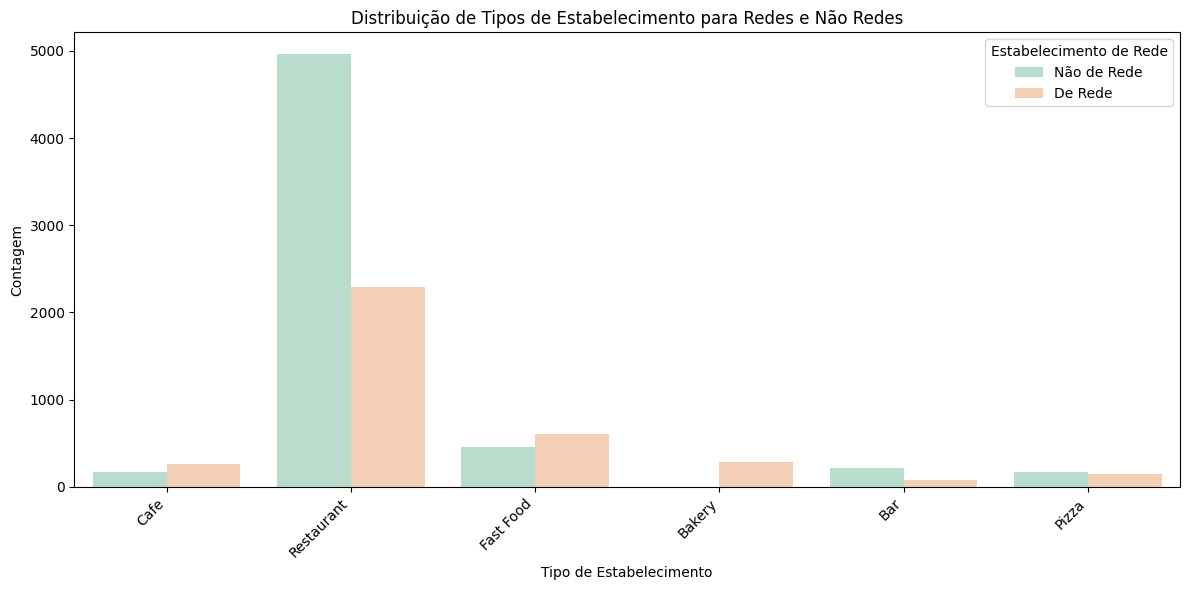

In [26]:
# Criando gráfico de barras para distribuição de tipos de estabelecimento para redes e não redes
plt.figure(figsize=(12, 6))
sns.countplot(data=rest_data, x='object_type', hue='chain', palette="Pastel2")
plt.title('Distribuição de Tipos de Estabelecimento para Redes e Não Redes')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estabelecimento de Rede', labels=['Não de Rede', 'De Rede'])
plt.tight_layout()
plt.show()

1. A maioria dos tipos de estabelecimento, como "Cafés", "Lanchonetes", "Padarias" e "Bares", possui uma presença maior de estabelecimentos não pertencentes a redes (Não de Rede). Por outro lado, a maioria dos "Restaurantes" são parte de uma rede (De Rede).

2. Estabelecimentos como "Cafés", "Lanchonetes" e "Padarias" têm uma presença mais significativa como estabelecimentos independentes (Não de Rede). Isso sugere uma tendência de diversidade e autenticidade nesses tipos de locais.

3. A categoria "Restaurante" é fortemente dominada por estabelecimentos de rede (De Rede). Isso pode indicar que redes de restaurantes são mais comuns e estabelecidas nessa categoria.

4. A cidade de Los Angeles oferece uma variedade de opções de estabelecimentos, incluindo tanto redes quanto independentes, para atender às preferências e necessidades dos consumidores.

- **Implicações para o Negócio:** Para abertura da cafeteria essa análise pode ajudar a entender a presença predominante de tipos de estabelecimentos independentes, como cafés, e o potencial para inovação em um mercado diversificado.


### O que caracteriza redes: muitos estabelecimentos com um pequeno número de assentos ou poucos estabelecimentos com muitos assentos?

Para entender o que caracteriza redes de estabelecimentos, podemos analisar a relação entre o número de estabelecimentos e o número de assentos para estabelecimentos de rede e não de rede. Vamos criar um gráfico de dispersão para visualizar essa relação entre o número de assentos e se um estabelecimento é de rede ou não. As cores e o uso de pontos ajudarão a identificar padrões na distribuição.

A análise dessa relação pode fornecer insights sobre as estratégias e características das redes de estabelecimentos em relação ao tamanho dos locais.

<Figure size 1000x600 with 0 Axes>

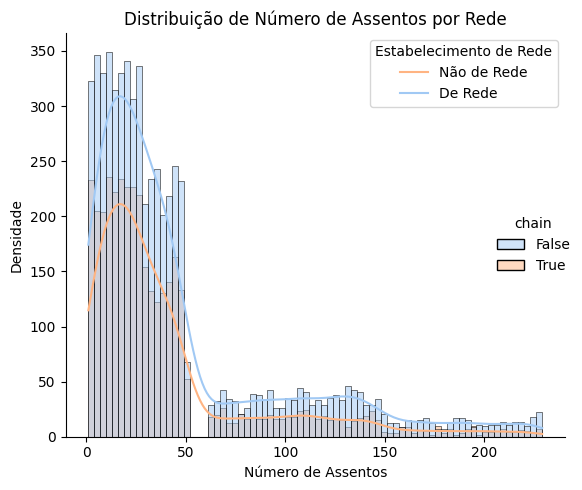

In [27]:
# Criando um gráfico de distribuição usando displot
plt.figure(figsize=(10, 6))
sns.displot(data=rest_data, x='number', hue='chain', palette='pastel', kde=True)
plt.title('Distribuição de Número de Assentos por Rede')
plt.xlabel('Número de Assentos')
plt.ylabel('Densidade')
plt.legend(title='Estabelecimento de Rede', labels=['Não de Rede', 'De Rede'])
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

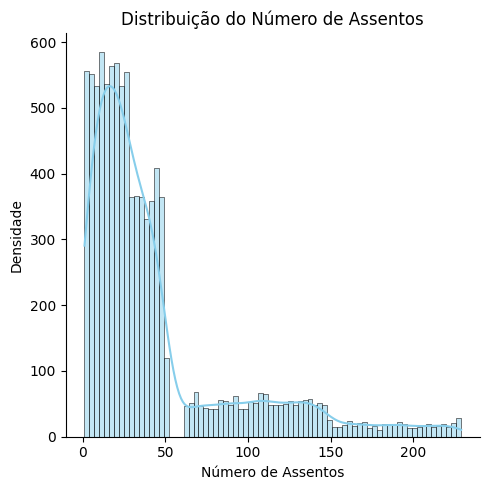

In [28]:
# Criando um gráfico de distribuição do número de assentos usando a coluna 'number'
plt.figure(figsize=(10, 6))
sns.displot(data=rest_data, x='number', kde=True, color='skyblue')
plt.title('Distribuição do Número de Assentos')
plt.xlabel('Número de Assentos')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

Com base na análise do gráfico de distribuição do número de assentos para redes e não redes, observa-se que o padrão predominante caracterizando as redes é a presença de muitos estabelecimentos com um pequeno número de assentos. A maior concentração de redes está associada a estabelecimentos com menor capacidade de assentos. Isso sugere que as redes de estabelecimentos tendem a ter várias unidades com capacidade limitada, possivelmente visando uma operação mais eficiente e uma experiência mais rápida para os clientes.

- Vamos criar um gráfico de dispersão comparando o número de estabelecimentos (eixo y) com o número de assentos (eixo x) para estabelecimentos de rede e não de rede.

In [29]:
# Criando o gráfico de dispersão usando Plotly
fig = px.scatter(rest_data, x='number', y='chain', color='chain',
                 title='Relação entre Número de Estabelecimentos e Número de Assentos por Rede',
                 labels={'number': 'Número de Assentos', 'chain': 'Estabelecimento de Rede'},
                 color_discrete_sequence=['#1f77b4', '#ff7f0e'],
                 opacity=0.7)
fig.update_layout(showlegend=True, legend_title_text='Estabelecimento de Rede',
                  xaxis=dict(gridcolor='lightgray', title_font=dict(size=14)),
                  yaxis=dict(gridcolor='lightgray', title_font=dict(size=14)),
                  legend=dict(font=dict(size=12)))
fig.show()


O gráfico de dispersão acima destaca a relação entre o número de estabelecimentos e o número de assentos, distinguindo entre estabelecimentos de rede e não de rede. Cada ponto no gráfico representa um estabelecimento, com o eixo x representando o número de assentos e o eixo y indicando se o estabelecimento pertence a uma rede. As cores das marcações diferenciam os dois tipos de estabelecimentos. Ao observar o padrão de pontos no gráfico, podemos começar a entender as tendências relacionadas ao tamanho dos estabelecimentos de rede em comparação com os não de rede. Isso nos ajudará a identificar se redes tendem a ter muitos estabelecimentos com poucos assentos ou poucos estabelecimentos com muitos assentos.

### Determine o número médio de assentos para cada tipo de restaurante. Em média, qual tipo de restaurante tem o maior número de assentos? Construa gráficos.

Vamos determinar o número médio de assentos para cada tipo de restaurante e criar gráficos para visualizar esses resultados. Vamos começar com um gráfico de barras para representar a média de assentos para cada tipo de restaurante

In [30]:
# Calculando a média de assentos por tipo de restaurante
average_seats_by_type = rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False)
average_seats_by_type

,number
object_type,
Restaurant,48.042316
Bar,44.767123
Fast Food,31.837711
Pizza,28.459375
Cafe,25.000000
Bakery,21.773852


<ipython-input-31-ccc8e0b067fe>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




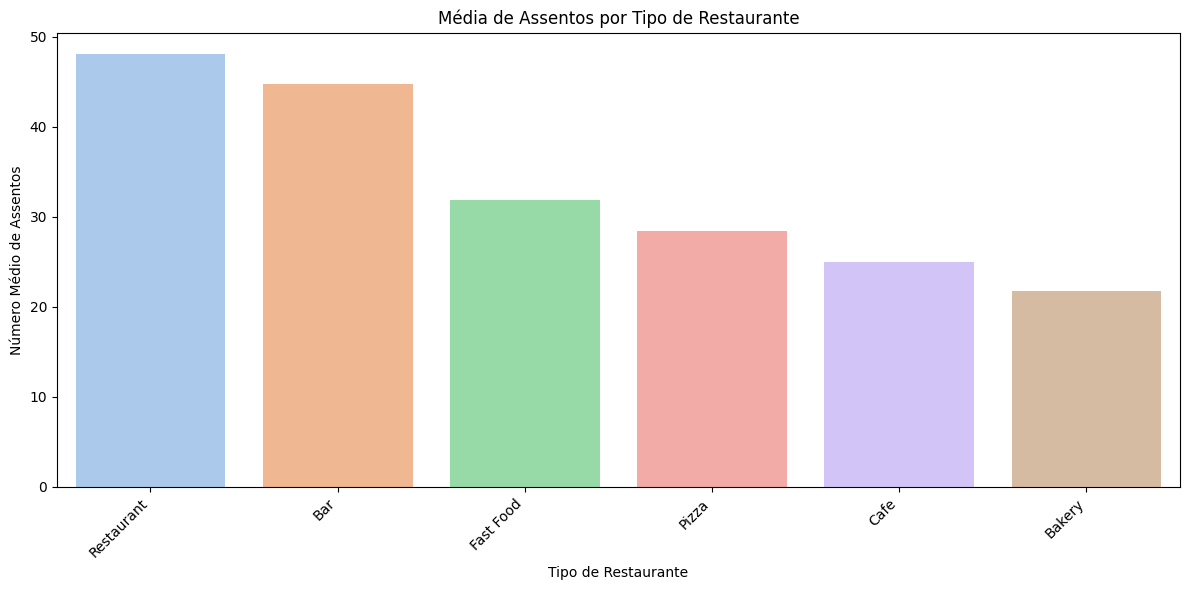

In [31]:
# Criar um gráfico de barras para média de assentos por tipo de restaurante
plt.figure(figsize=(12, 6))
sns.barplot(x=average_seats_by_type.index, y=average_seats_by_type.values, palette="pastel")
plt.title('Média de Assentos por Tipo de Restaurante')
plt.xlabel('Tipo de Restaurante')
plt.ylabel('Número Médio de Assentos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. **Restaurantes com Mais Assentos:** Em média, os restaurantes têm o maior número de assentos, com uma média de aproximadamente 48 assentos por estabelecimento.

2. **Variação entre Tipos:** A análise das médias revela que bares e fast foods também têm médias consideráveis de assentos, com cerca de 45 e 32 assentos, respectivamente.

3. **Tipos com Menor Média de Assentos:** Cafés e padarias têm as médias mais baixas de assentos, com cerca de 25 e 22 assentos, respectivamente.

- **Diversidade de Ofertas:** A variedade nas médias de assentos sugere que diferentes tipos de restaurantes atendem a diferentes públicos e preferências.

- **Planejamento de Espaço:** Isso pode ajudar a definir o layout e a capacidade do local que pretendemos abrir, de acordo com o público-alvo e a proposta do negócio.

- **Adaptação Estratégica:** Considerar as médias de assentos também pode ser importante ao definir preços, serviço e experiência do cliente, alinhando-se às expectativas típicas do tipo de restaurante.

### Coloque os dados dos nomes das ruas da coluna `address` em uma coluna separada.

Para extrair os nomes das ruas da coluna address e colocá-los em uma coluna separada, podemos usar o método ***str.split()*** do Pandas.

In [32]:
# Criando uma nova coluna 'street_name' com os nomes das ruas
rest_data['street_name'] = rest_data['address'].str.split(',', expand=True)[0]

In [33]:
# Exibindo as primeiras linhas do DataFrame com a nova coluna
rest_data.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,3708 N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,100 WORLD WAY # 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,6801 HOLLYWOOD BLVD # 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814 W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100 ECHO PARK AVE


Vamos agregar os clientes na mesma rua como parte da mesma categoria

In [34]:
# Agregando por nome de rua e calculando o número total de estabelecimentos em cada categoria
aggregated_data = rest_data.groupby(['street_name', 'object_type'])['object_name'].count().reset_index()

In [35]:
# Renomeando a coluna para facilitar a interpretação
aggregated_data.rename(columns={'object_name': 'estabelecimentos_count'}, inplace=True)

In [36]:
# Visualizando o DataFrame agregado
aggregated_data.head(10)

,street_name,object_type,estabelecimentos_count
0,00936 S MAPLE AVE 17,Restaurant,1
1,01253 N VINE ST # #7A,Restaurant,1
2,03742 S FLOWER ST,Restaurant,1
3,05358 WILSHIRE BLVD,Restaurant,1
4,0800 W 6TH ST,Restaurant,1
5,08050 W 3RD ST,Restaurant,1
6,0928 S WESTERN AVE # #103,Bakery,1
7,1 GATEWAY PLZ,Restaurant,1
8,1 GATEWAY PLZ FL 3RD F,Restaurant,1
9,1 LMU DR,Restaurant,1


- A coluna `address` se torna repetitiva e desnecessária após a criação da coluna `street_name`. Dessa forma, podemos  excluí-la para simplificar o conjunto de dados e evitar a duplicação de informações. A remoção da coluna `address` pode ajudar a manter seus dados mais organizados e eliminar a duplicação de informações.

In [37]:
# Removendo a coluna 'address' do DataFrame
rest_data.drop(columns=['address'], inplace=True)

In [38]:
# Verificando o dataframe apos remocao
rest_data.head()

,id,object_name,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,False,Cafe,26,3708 N EAGLE ROCK BLVD
1,11787,REILLY'S,False,Restaurant,9,100 WORLD WAY # 120
2,11788,STREET CHURROS,False,Fast Food,20,6801 HOLLYWOOD BLVD # 253
3,11789,TRINITI ECHO PARK,False,Restaurant,22,1814 W SUNSET BLVD
4,11790,POLLEN,False,Restaurant,20,2100 ECHO PARK AVE


### Construa um gráfico de dez ruas com o maior número de restaurantes.

Vamos contar quantos restaurantes existem em cada rua e, em seguida, selecionar as dez ruas com mais restaurantes. Depois criamos um gráfico de barras para visualizar o número de restaurantes em cada uma das dez ruas principais.


In [39]:
# Contando o número de restaurantes por rua
restaurants_per_street = rest_data['street_name'].value_counts()
restaurants_per_street

,count
street_name,
3607 TROUSDALE PKWY,11
135 N GRAND AVE,10
600 WORLD WAY,9
5151 STATE UNIVERSITY DR,9
400 WORLD WAY,9
...,...
308 WESTWOOD PLZ STE A260,1
6333 W 3RD ST STE E-11,1
6602 MELROSE AVE,1


In [40]:
# Selecionando as dez ruas com mais restaurantes
top_10_streets = restaurants_per_street.head(10)
top_10_streets

,count
street_name,
3607 TROUSDALE PKWY,11
135 N GRAND AVE,10
600 WORLD WAY,9
5151 STATE UNIVERSITY DR,9
400 WORLD WAY,9
700 WORLD WAY,8
545 S FIGUEROA ST,8
2025 AVENUE OF THE STARS,8
300 WORLD WAY,8


<ipython-input-41-01c32b593bf2>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




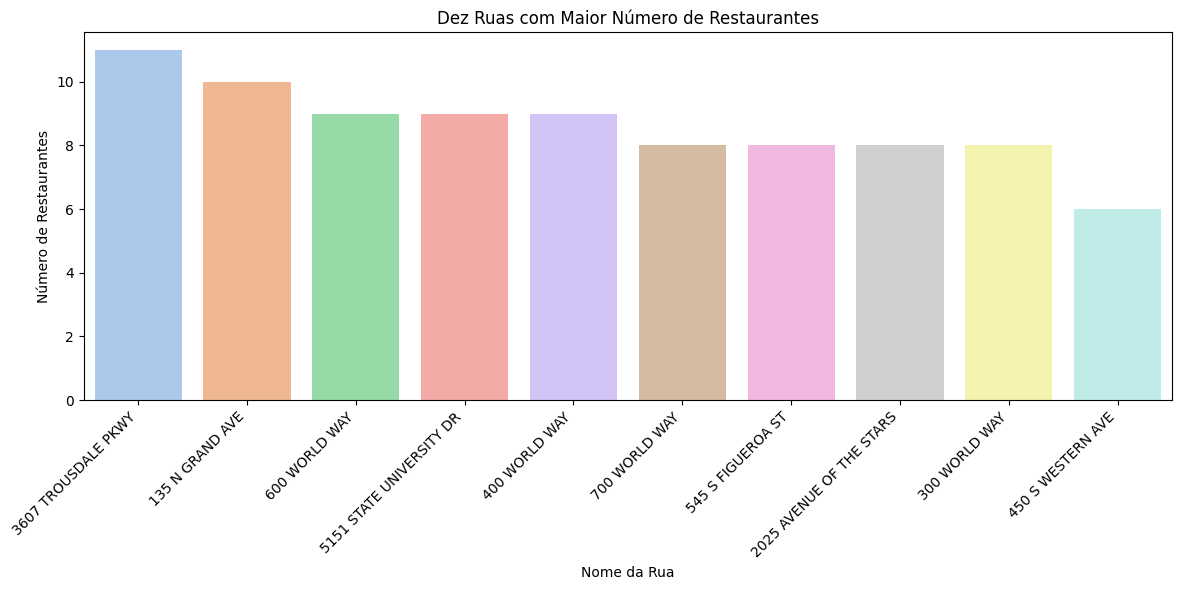

In [41]:
# Criando um gráfico de barras das dez ruas com mais restaurantes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_streets.index, y=top_10_streets.values, palette='pastel')
plt.title('Dez Ruas com Maior Número de Restaurantes')
plt.xlabel('Nome da Rua')
plt.ylabel('Número de Restaurantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Com base nos resultados apresentados, podemos observar as dez ruas com o maior número de restaurantes em Los Angeles:

1. Trousdale Pkwy (3607) - 11 restaurantes
2. N Grand Ave (135) - 10 restaurantes
3. World Way (400) - 9 restaurantes
4. State University Dr (5151) - 9 restaurantes
5. World Way (600) - 9 restaurantes
6. Avenue of the Stars (2025) - 8 restaurantes
7. S Figueroa St (545) - 8 restaurantes
8. World Way (700) - 8 restaurantes
9. World Way (300) - 8 restaurantes
10. World Way (100) - 6 restaurantes

Este gráfico permite identificar as ruas mais populares em termos de concentração de restaurantes. Isso pode fornecer informações valiosas sobre as áreas mais movimentadas e propícias para a indústria de restaurantes em Los Angeles.

### Encontre o número de ruas que têm apenas um restaurante.

Para encontrar o número de ruas que têm apenas um restaurante, vamos contar quantas vezes cada rua aparece na coluna `street_name` e depois contar quantas vezes essa contagem é igual a 1.

Isso permitirá identificar quantas ruas têm uma presença única de estabelecimentos gastronômicos em Los Angeles.

In [42]:
# Contando o número de ruas com apenas um restaurante
single_restaurant_streets = (rest_data['street_name'].value_counts() == 1).sum()
single_restaurant_streets

np.int64(7604)

In [43]:
# Exibindo o número de ruas com apenas um restaurante
print("Número de ruas com apenas um restaurante:", single_restaurant_streets)

Número de ruas com apenas um restaurante: 7604


- O número de ruas em Los Angeles que têm apenas um restaurante é **7604**. Isso sugere que há uma grande diversidade de áreas com uma única opção de restaurante, possivelmente indicando oportunidades para expansão ou diversificação em algumas localizações.

### Para as ruas com muitos restaurantes, olhe para a distribuição de número de assentos. Quais tendências você consegue notar?

Para analisar a distribuição de número de assentos em ruas com muitos restaurantes, vamos identificar as ruas com muitos restaurantes e, em seguida, analisar a distribuição de número de assentos nessas ruas. Vamos considerar ruas com pelo menos 5 restaurantes como "ruas com muitos restaurantes".

In [44]:
# Encontrando ruas com muitos restaurantes (pelo menos 5)
popular_streets = rest_data['street_name'].value_counts()[rest_data['street_name'].value_counts() >= 5].index
popular_streets

Index(['3607 TROUSDALE PKWY', '135 N GRAND AVE', '600 WORLD WAY',
       '5151 STATE UNIVERSITY DR', '400 WORLD WAY', '700 WORLD WAY',
       '545 S FIGUEROA ST', '2025 AVENUE OF THE STARS', '300 WORLD WAY',
       '450 S WESTERN AVE', '100 WORLD WAY', '800 N ALAMEDA ST',
       '6360 W SUNSET BLVD', '6250 HOLLYWOOD BLVD', '900 W OLYMPIC BLVD',
       '500 WORLD WAY', '2740 W OLYMPIC BLVD', '7000 HOLLYWOOD BLVD',
       '10250 SANTA MONICA BLVD', '380 WORLD WAY', '6201 WHITTIER BLVD'],
      dtype='object', name='street_name')

In [45]:
# Filtrando o DataFrame para incluir apenas as ruas com muitos restaurantes
popular_streets_data = rest_data[rest_data['street_name'].isin(popular_streets)]
popular_streets_data

,id,object_name,chain,object_type,number,street_name
19,11805,DELTA SKY CLUB T3,False,Restaurant,103,300 WORLD WAY
46,11832,THE COUNTER SPACE 7C,True,Restaurant,20,700 WORLD WAY
56,11842,LOTERIA GRILL SPACE 7C,False,Restaurant,17,700 WORLD WAY
62,11848,ROLLING STONE SPACE 7C,False,Restaurant,33,700 WORLD WAY
107,11893,ADMIRALS CLUB,False,Restaurant,118,400 WORLD WAY
...,...,...,...,...,...,...
9067,20853,WETZELS PRETZEL'S,False,Restaurant,21,800 N ALAMEDA ST
9115,20901,THE COFFEE BEAN & TEA LEAF - TICKETING,True,Cafe,7,380 WORLD WAY
9219,21005,THE COFFEE BEAN & TEA LEAF #314,True,Cafe,27,10250 SANTA MONICA BLVD
9322,21108,THE COFFEE BEAN & TEA LEAF,True,Cafe,26,500 WORLD WAY


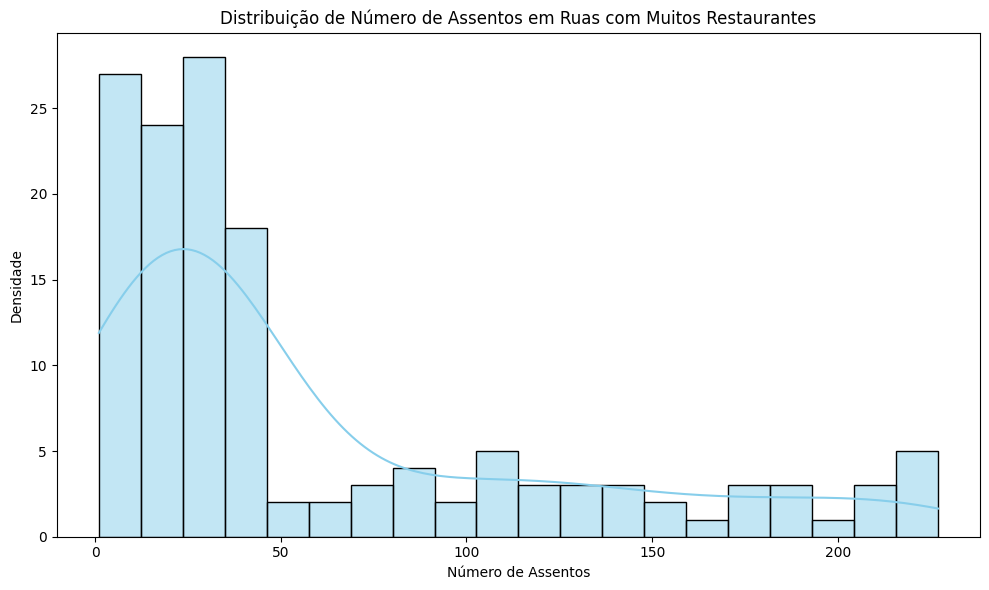

In [46]:
# Criando um gráfico de distribuição para o número de assentos nas ruas com muitos restaurantes
plt.figure(figsize=(10, 6))
sns.histplot(data=popular_streets_data, x='number', bins=20, kde=True, color='skyblue')
plt.title('Distribuição de Número de Assentos em Ruas com Muitos Restaurantes')
plt.xlabel('Número de Assentos')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

Ao analisar a distribuição de número de assentos nas ruas com muitos restaurantes, podemos notar as seguintes tendências:

1. **Variação de Tamanho:** Existe uma variação significativa no tamanho dos estabelecimentos gastronômicos nessas ruas. A distribuição abrange desde estabelecimentos com um número reduzido de assentos até aqueles com capacidade mais ampla.

2. **Predominância de Estabelecimentos Pequenos a Médios:** A maior concentração de restaurantes parece estar nos segmentos de estabelecimentos menores a médios, com um número limitado de assentos. Isso sugere que muitos desses locais buscam oferecer uma experiência mais íntima e acolhedora.

3. **Variedade de Opções para Diferentes Públicos:** A distribuição diversificada de tamanhos de estabelecimentos pode indicar uma oferta ampla para diferentes tipos de público.

4. **Competição e Segmentação:** A presença de uma gama de tamanhos de estabelecimentos sugere uma concorrência diversificada e uma segmentação do mercado. Isso pode levar a uma competição saudável e à coexistência de diferentes conceitos e estilos gastronômicos.

5. **Adaptação ao Espaço Disponível:** A variação de tamanhos pode refletir a capacidade dos estabelecimentos de se adaptarem ao espaço disponível em cada rua.

6. **Potencial de Negócios:** A análise da distribuição de assentos nessas ruas pode fornecer insights para a definição de estratégias de negócios. Dependendo do conceito e do público-alvo, podemos identificar oportunidades para preencher lacunas no mercado com estabelecimentos de determinados tamanhos.

Em resumo, a análise da distribuição de assentos em ruas com muitos restaurantes revela uma paisagem gastronômica diversificada, com estabelecimentos de diferentes tamanhos atendendo a uma ampla gama de preferências e necessidades dos consumidores.

Através do gráfico de radar abaixo, podemos transmitir visualmente a distribuição de importância em diferentes categorias:

- Diferenciação
-  Localização
- Experiência do Cliente
- Ambiente
- Expansão

In [47]:
# Dados para o gráfico de radar
categorias = ['Diferenciação', 'Localização', 'Experiência do Cliente', 'Ambiente', 'Expansão']
recomendacoes = [8, 9, 7, 6, 5]  # Valores de 0 a 10 para cada categoria

In [48]:
# Replicando o primeiro valor para fechar o gráfico
recomendacoes.append(recomendacoes[0])

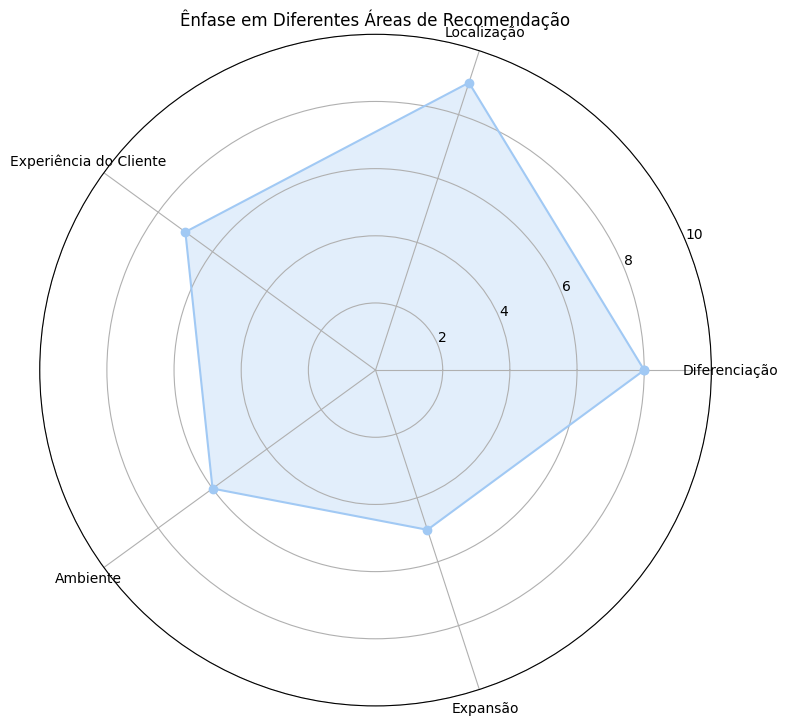

In [49]:
# Criando um gráfico de radar
plt.figure(figsize=(8, 8))
plt.polar(np.radians(np.linspace(0, 360, len(categorias) + 1)), recomendacoes, marker='o')
plt.fill(np.radians(np.linspace(0, 360, len(categorias) + 1)), recomendacoes, alpha=0.3)
plt.thetagrids(range(0, 360, int(360/len(categorias))), labels=categorias)
plt.ylim(0, 10)
plt.title('Ênfase em Diferentes Áreas de Recomendação')
plt.tight_layout()
plt.show()


## Conclusão Geral e Recomendações para o Mercado de Restaurantes em Los Angeles

**Variedade e Estratégia de Diferenciação:**
Los Angeles oferece uma gama diversificada de tipos de restaurantes, com foco em restaurantes, fast foods, cafés, pizzarias, bares e padarias. Para se destacar em meio à concorrência, é fundamental criar uma estratégia de diferenciação. Concentrar-se em uma proposta única, como culinária especializada, ambiente cativante ou experiência exclusiva, pode ser a chave para atrair e reter clientes.

**Considerações sobre Tamanho do Estabelecimento:**
A análise do número de assentos revela que a maioria dos restaurantes possui uma capacidade relativamente limitada. No entanto, a presença de estabelecimentos com maior capacidade também é notável. A escolha do número de assentos deve ser deliberada e alinhada com o conceito do restaurante, público-alvo e disponibilidade de espaço.

**Avaliação Estratégica de Localização:**
Ao escolher uma localização, é vital avaliar a densidade de restaurantes nas proximidades, a demanda da região e o perfil dos potenciais clientes. Enquanto áreas populares podem fornecer visibilidade, elas também podem apresentar uma concorrência intensa. O equilíbrio entre visibilidade e mercado local é essencial.

**Foco na Experiência do Cliente:**
O sucesso de um restaurante é fortemente influenciado pela qualidade do serviço, o ambiente e a experiência do cliente. Investir em treinamento da equipe e na criação de um ambiente agradável pode gerar um diferencial significativo, atraindo e fidelizando os clientes.

**Inovação e Adaptação:**
Acompanhar as tendências do mercado, como opções de alimentos saudáveis, sustentáveis ou voltados para vegetarianos/veganos, pode atrair um público diversificado e alinhado com as mudanças sociais e de consumo.

**Pesquisa de Mercado Contínua:**
A manutenção de uma pesquisa de mercado contínua é crucial para se manter atualizado sobre as preferências do cliente, as tendências da indústria e as mudanças na demanda. Isso permitirá ajustar sua estratégia de acordo com as necessidades em constante evolução.

Em resumo, entrar no mercado de restaurantes de Los Angeles demanda um planejamento criterioso, uma abordagem inovadora e uma compreensão profunda das necessidades dos clientes locais. Com uma estratégia personalizada e adaptável, é possível construir um negócio de sucesso.